In [0]:
import numpy as np
from keras.datasets import cifar10
from keras. utils import np_utils

#CIFAR-10のデータセットをダウンロード
(x_train, t_train), (x_test, t_test) = cifar10.load_data()

#画素値データをfloat型に変換
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

#画素値データを0.0～1.0の範囲に正規化
x_train /= 255
x_test /= 255

#正解ラベルをone-hot表現に変換
classes = 10
t_train = np_utils.to_categorical(t_train, classes)
t_test = np_utils.to_categorical(t_test, classes)

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from keras.optimizers import RMSprop

#Sequentialをインスタンス化
model = Sequential()

#ハイパーパラメータの値を設定
weight_decay = 1e-4

#CNNを構成
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), padding="same", kernel_regularizer=regularizers.l2(weight_decay), activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", kernel_regularizer=regularizers.l2(weight_decay), activation="relu"))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same",  kernel_regularizer=regularizers.l2(weight_decay), activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same",  kernel_regularizer=regularizers.l2(weight_decay), activation="relu"))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same",  kernel_regularizer=regularizers.l2(weight_decay), activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same",  kernel_regularizer=regularizers.l2(weight_decay), activation="relu"))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(classes, activation="softmax"))

#損失関数は交差エントロピー誤差、最適化手法はAdam、性能評価は正解率を指定
model.compile(loss="categorical_crossentropy", optimizer=RMSprop(), metrics=["accuracy"])

#CNNの構成を表示
model.summary()

#学習を行う
history = model.fit(x_train, t_train, batch_size=100, epochs=100, verbose=1, validation_data=(x_test, t_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 32)        9248      
__________

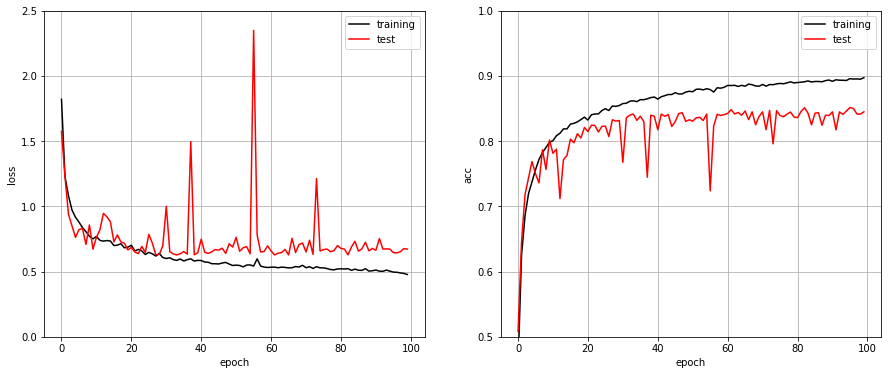

In [7]:
#グラフで結果を出力
%matplotlib inline
import matplotlib.pyplot as plt

#プロット図のサイズを指定
plt.figure(figsize=(15, 6))

#プロット図を縮小して図の間のスペースを空ける
plt.subplots_adjust(wspace=0.2)

#1×2のグリッドの左(1,2,1)の領域にプロット
plt.subplot(1,2,1)

#誤差の推移をプロット
plt.plot(history.history["loss"], label="training", color="black")
plt.plot(history.history["val_loss"], label="test", color="red")

plt.ylim(0,2.5) #y軸の範囲
plt.legend()  #凡例を表示
plt.grid()    #グリッドを表示

plt.xlabel("epoch") #x軸のラベル
plt.ylabel("loss")  #y軸のラベル


#1×2のグリッドの左(1,2,2)の領域にプロット
plt.subplot(1,2,2)

#正解率の推移をプロット
plt.plot(history.history["acc"], label="training", color="black")
plt.plot(history.history["val_acc"], label="test", color="red")

plt.ylim(0.5,1) #y軸の範囲
plt.legend()  #凡例を表示
plt.grid()    #グリッドを表示

plt.xlabel("epoch") #x軸のラベル
plt.ylabel("acc")  #y軸のラベル

plt.show()